In [1]:
import gluoncv as gcv
import mxnet as mx
import matplotlib.pyplot as plt

In [2]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = "dog.jpg"
gcv.utils.download(url =image_url, path = image_filepath)

'dog.jpg'

In [3]:
image = mx.image.imread(image_filepath)
print('1.type          :', type(image))
print("2.shape         :", image.shape)
print("3.data type     :", image.dtype)
print("4.min value     :", image.min().asscalar)
print("\n5.maximum value :", image.max().asscalar)

1.type          : <class 'mxnet.ndarray.ndarray.NDArray'>
2.shape         : (576, 768, 3)
3.data type     : <class 'numpy.uint8'>
4.min value     : <bound method NDArray.asscalar of 
[0]
<NDArray 1 @cpu(0)>>

5.maximum value : <bound method NDArray.asscalar of 
[255]
<NDArray 1 @cpu(0)>>


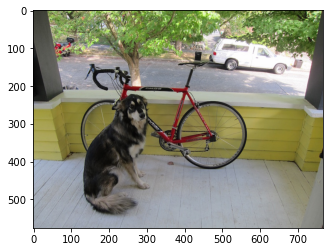

In [4]:
plt.imshow(image.asnumpy())

In [5]:
#tansform and batch image to the required formate
image, chw_image=gcv.data.transforms.presets.yolo.transform_test(image, short =512)
print("shape",image.shape)
print("data tpye ",image.dtype)
print("minimum value",image.min().asscalar())
print("maximum value", image.max().asscalar())


shape (1, 3, 512, 683)
data tpye  <class 'numpy.float32'>
minimum value -2.117904
maximum value 2.64


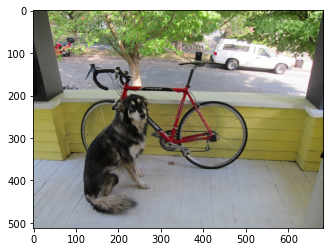

In [6]:
plt.imshow(chw_image)

In [7]:
#Load model coco 
network = gcv.model_zoo.get_model('yolo3_darknet53_coco',pretrained=True)

In [8]:
!ls -sh /home/ec2-user/.mxnet/models/yolo3_darknet53_coco*.params

ls: cannot access '/home/ec2-user/.mxnet/models/yolo3_darknet53_coco*.params': No such file or directory


In [9]:
#made prediction
prediction = network(image)

In [10]:
type(prediction)

tuple

In [11]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index+1 , array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


In [12]:
prediction = [array[0] for array in prediction]

In [13]:
class_indecies , probability ,boundry_box = prediction

In [14]:
k = 10
print(class_indecies [:k])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [15]:
class_index = 16
assert class_index >-1
print(network.classes[class_index])


dog


In [16]:
print(probability[:k])


[[ 0.9919529 ]
 [ 0.9600398 ]
 [ 0.6226973 ]
 [ 0.29241988]
 [ 0.01795179]
 [ 0.01141722]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [17]:
print(boundry_box[:k])


[[116.53647  201.33237  281.90323  482.0909  ]
 [ 93.929794 107.73938  504.75128  375.75424 ]
 [416.78833   69.80066  615.01794  148.89008 ]
 [416.78833   69.80066  615.01794  148.89008 ]
 [ 90.883575 125.87877  504.44492  402.79553 ]
 [532.78235   91.84184  547.3104   104.6911  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


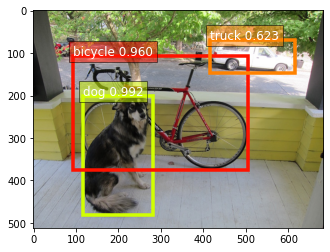

In [17]:
gcv.utils.viz.plot_bbox(chw_image,
                        boundry_box,
                        probability,
                        class_indecies,
                        
                        class_names = network.classes )